# Code for Entry 6 - Module 8 - Novelty Aspect

Entry for the Complex Systems ePortfolio created by group 6. 

**Project contributers**: Djourdan Johnson, Jacuqot Qiu, Lotte Michels, Nawat Nawati Azhati, Nuo Xu, Xuelin Wei

In [2]:
# Install Dynamic Time Warping library
!pip install dtw-python
!pip install dtaidistance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.7/801.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.4 MB/s eta 0:00:0000:0100:01


In [3]:
# Libraries
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert
from scipy.stats import pearsonr
from dtw import *
from sklearn.preprocessing import StandardScaler
from scipy.stats import sem, t


Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [4]:
import random
random.seed(42)

In [5]:
# Load data
data = pd.read_csv("/kaggle/input/beehive-dataset/D1_sensor_data.csv", sep=",")

# Filter the data for tag_number 202204
hive = 202204 # ID = without the first 2, but the sensor data contains a number 2 before each ID
# 02204 is in Coté. GPS points: 46°44’30.21’’N, 71°28’28.41’’O
# usable beehives are: 202213 (noisy though), 202204, 202196 (some cutoff below -10 in the power measurements)
variables = ['temperature', 'humidity', 'tag_number', 'geolocation', 'hive_power', 'date', 'time', 'beehub_name']

hive_data = data.loc[data['tag_number'] == hive, variables].reset_index()
print('The sensor data for hive {} contains {} measurements'.format(hive, hive_data.shape[0]))
#print(hive_data.head(-5))

# Remove duplicate timepoints
hive_data['datetime'] = pd.to_datetime(hive_data['date'] + ' ' + hive_data['time'])
filtered_data = hive_data.drop_duplicates(subset='datetime')
#print('The sensor data for hive {} contains {} measurements after duplicate timepoint removal'.format(hive, filtered_data.shape[0]))


The sensor data for hive 202204 contains 16037 measurements


<Figure size 640x480 with 0 Axes>

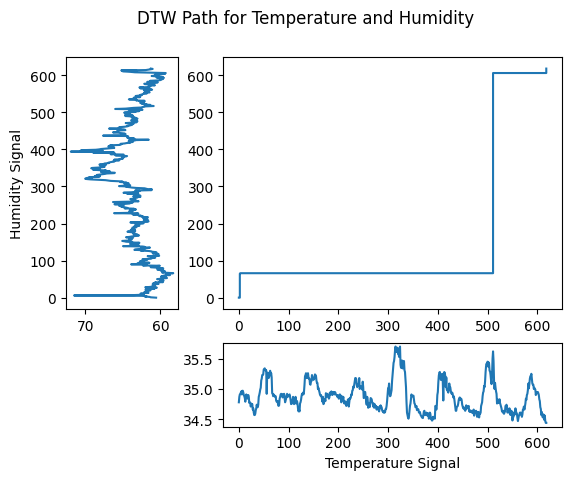

<Figure size 640x480 with 0 Axes>

In [ ]:
# VISUALIZATION FOR SECTION 2

# Conceptually demonstrate DTW

plt.style.use('default')

# Select week data
week = ['2020-08-08', '2020-08-09', '2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14']
df = filtered_data[filtered_data['date'].isin(week)].reset_index()

# Humidity vs Temperature
day_alignment = dtw(df['temperature'], df['humidity'], keep_internals=True) 

plt.figure()
day_alignment.plot(type="threeway", xlab="Temperature Signal", ylab="Humidity Signal") 
plt.suptitle("DTW Path for Temperature and Humidity")
plt.savefig('dtw_fig2')
plt.show()

plt.figure()
day_alignment.plot(type="twoway", xlab="Time",  ylab="Signal Distance")
plt.title("Alignment for Temperature and Humidity")
plt.legend(['Temperature', 'Humidity'])  
plt.savefig('dtw_fig1')
plt.show()


<Figure size 640x480 with 0 Axes>

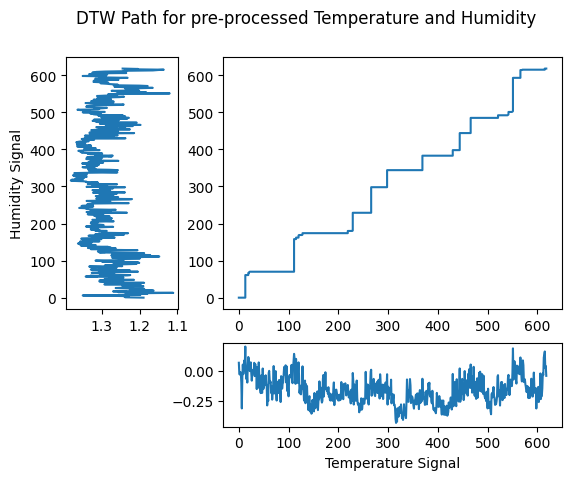

<Figure size 640x480 with 0 Axes>

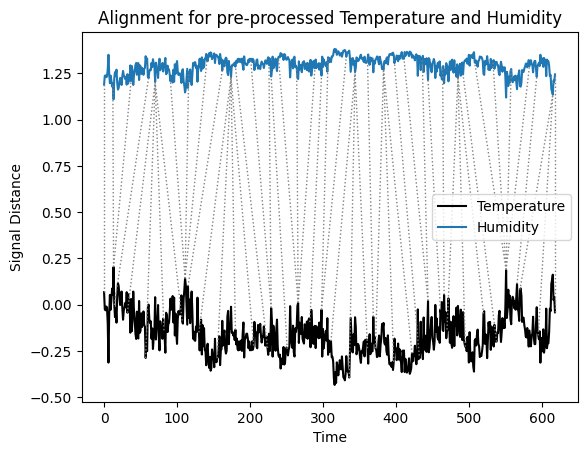

In [7]:
# VISUALIZATION FOR SECTION 3

# Previous plots show that preprocessing is necessary (to account for differences in unit (mean and standard deviation))

# Signal preprocessing

temp = df['temperature'].values
hum = df['humidity'].values
power = df['hive_power'].values

scaler = StandardScaler() # applies centering and scaling
temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power])

# # Make the same plot but now with pre-processed data
# norm_day_alignment = dtw(temp_norm, hum_norm, keep_internals=True) 
# norm_day_alignment.plot(type="threeway") 
# norm_day_alignment.plot(type="twoway")

# Previous plots also show that a window should be set to limit the scope of temporal matches, preventing unrealistic alignments

# We set the time radius to 1 day (window_size = 48, to account for 12*4 is 12 hours worth of measurements (records are taken every 15 mins))) using the sakoechiba method:
windowed_alignment = dtw(temp_norm, hum_norm, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})  # window_size defines allowed time shift

plt.figure()
windowed_alignment.plot(type="threeway", xlab="Temperature Signal", ylab="Humidity Signal") 
plt.suptitle("DTW Path for pre-processed Temperature and Humidity")
plt.savefig('dtw_fig4')
plt.show()

plt.figure()
windowed_alignment.plot(type="twoway", xlab="Time",  ylab="Signal Distance")
plt.title("Alignment for pre-processed Temperature and Humidity")
plt.legend(['Temperature', 'Humidity'])  
plt.savefig('dtw_fig3')
plt.show()


In [8]:
# COMPUTATIONS FOR SECTION 4

# Finally do DTW for full signals

df = filtered_data

# Signal preprocessing
temp = df['temperature'].values
hum = df['humidity'].values
power = df['hive_power'].values

scaler = StandardScaler() # applies centering and scaling
temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power])

# Perform DTW on full signals
th_alignment = dtw(temp_norm, hum_norm, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})  # window_size defines allowed time shift
ph_alignment = dtw(power_norm, hum_norm, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})  # window_size defines allowed time shift
tp_alignment = dtw(temp_norm, power_norm, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})  # window_size defines allowed time shift

<Figure size 640x480 with 0 Axes>

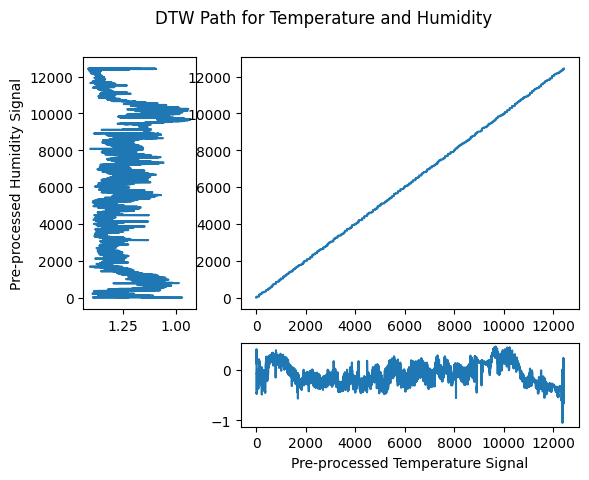

<Figure size 640x480 with 0 Axes>

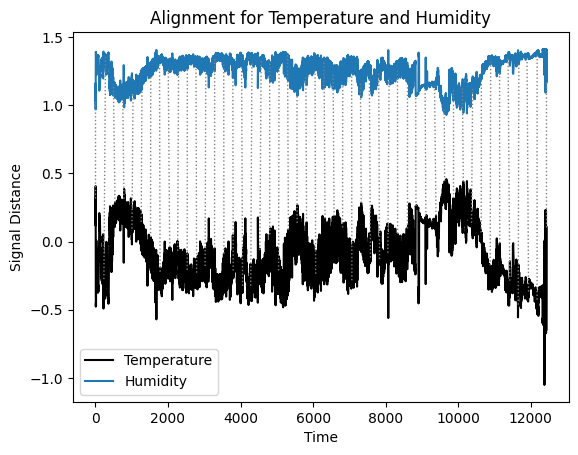

<Figure size 640x480 with 0 Axes>

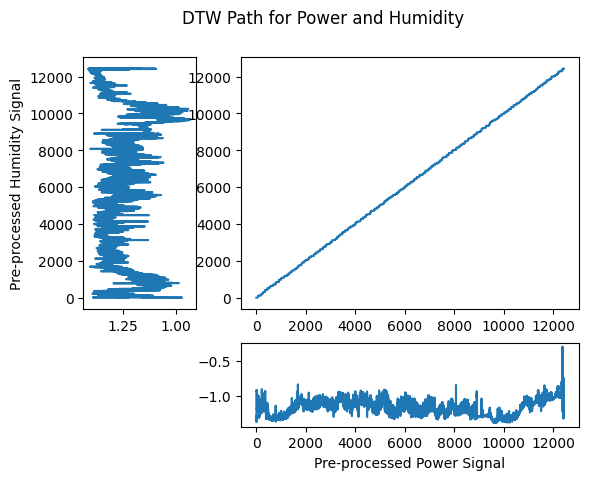

<Figure size 640x480 with 0 Axes>

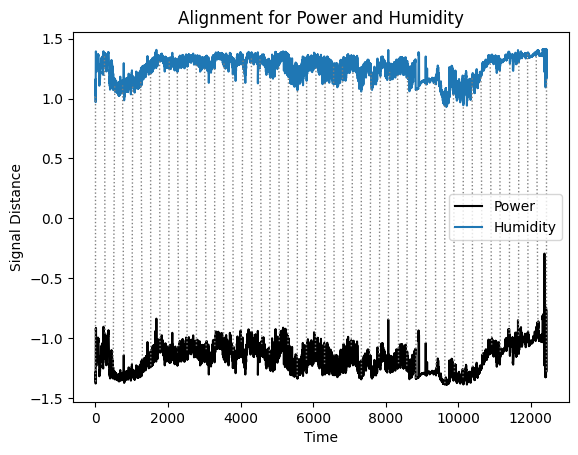

<Figure size 640x480 with 0 Axes>

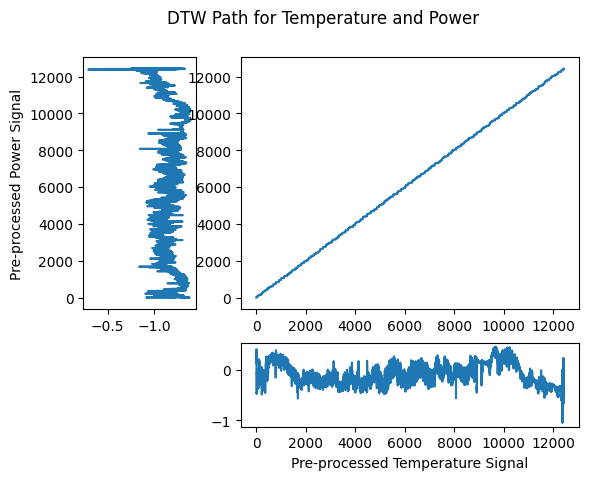

<Figure size 640x480 with 0 Axes>

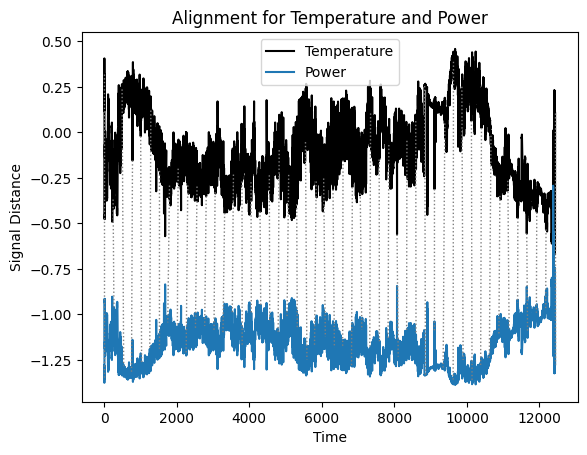

In [9]:
# VISUALIZATIONS FOR SECTION 4

plt.style.use('default')

# Temperature vs Humidity
plt.figure()
th_alignment.plot(type="threeway", xlab="Pre-processed Temperature Signal", ylab="Pre-processed Humidity Signal")
plt.suptitle("DTW Path for Temperature and Humidity")
plt.show()

plt.figure()
th_alignment.plot(type="twoway", xlab="Time",  ylab="Signal Distance")
plt.title("Alignment for Temperature and Humidity")
plt.legend(['Temperature', 'Humidity'])  
plt.show()

# Power vs Humidity
plt.figure()
ph_alignment.plot(type="threeway", xlab="Pre-processed Power Signal", ylab="Pre-processed Humidity Signal") 
plt.suptitle("DTW Path for Power and Humidity")
plt.show()

plt.figure()
ph_alignment.plot(type="twoway", xlab="Time",  ylab="Signal Distance")
plt.title("Alignment for Power and Humidity")
plt.legend(['Power', 'Humidity'])  
plt.show()

# Temperature vs Power
plt.figure()
tp_alignment.plot(type="threeway", xlab="Pre-processed Temperature Signal", ylab="Pre-processed Power Signal") 
plt.suptitle("DTW Path for Temperature and Power")
plt.show()

plt.figure()
tp_alignment.plot(type="twoway", xlab="Time",  ylab="Signal Distance")
plt.title("Alignment for Temperature and Power")
plt.legend(['Temperature', 'Power'])  
plt.show()


In [10]:
# STATISTICS FOR SECTION 4

# dtw-python then returns these metrics that give an indication of how far two signals are apart
print(th_alignment.distance)
print(th_alignment.normalizedDistance, '\n')

print(ph_alignment.distance)
print(ph_alignment.normalizedDistance, '\n')

print(tp_alignment.distance)
print(tp_alignment.normalizedDistance, '\n')
# however, it is difficult to interpret if these numbers mean two signals are 'similar' or not

# however, it is difficult to interpret if these numbers mean two signals are 'similar' or not
# We can get a similarity score using the DTAIDistance library:
# Similarity scores for one week in the data:
from dtaidistance import dtw

df = filtered_data
temp = df['temperature'].values
hum = df['humidity'].values
power = df['hive_power'].values
scaler = StandardScaler() # applies centering and scaling
temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power]) 

distance, paths = dtw.warping_paths(temp_norm, hum_norm,window=48)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)
print('Full sim. for temperature/humidity:', similarity_score)

distance, paths = dtw.warping_paths(power_norm, hum_norm,window=48)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)
print('Full sim. for power/humidity:', similarity_score)

distance, paths = dtw.warping_paths(temp_norm, power_norm,window=48)
best_path = dtw.best_path(paths)
similarity_score = distance / len(best_path)
print('Full sim. for temperature/power:', similarity_score)

# these scores by themselves however may not be valuable/reliable; look at the plots (and compare)


30989.87998994026
1.246375482220892 

57845.65737825698
2.326482359164132 

23793.504425268045
0.9569459630497122 

Full sim. for temperature/humidity: 0.012327092206368505
Full sim. for power/humidity: 0.021692656330800735
Full sim. for temperature/power: 0.009729424514530845


In [11]:
# COMPUTATIONS FOR SECTION 5

# Computing one single distance/similarity score assumes that this metric holds for the whole temporal period
# In reality, coordination may not always be as strong between two signals
# We can make a temporal plot of the DTW similarity between two signals over time 
# Inspiration taken from: https://pmc.ncbi.nlm.nih.gov/articles/PMC9851773/ and https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00075/full
from dtw import *

# Get data for whole time period
df = filtered_data

# Pre-process
temp = df['temperature'].values
hum = df['humidity'].values
power = df['hive_power'].values
scaler = StandardScaler() # applies centering and scaling
temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power])

# Define parameters and placeholders
window_size = 96  # window covers 1 day in the data if size = 24 * 4 = 96 (4 timepoints per hour)) and 1 week if size = 7 * 96 = 672
step_size = 1     # Step size for sliding window (e.g., move 1 point forward at each step)

th_distance_scores = []
ph_distance_scores = []
tp_distance_scores = []

# Slide the window across the signals
for i in range(0, len(temp_norm) - window_size + 1, step_size):
    # Define variable windows
    t_window = temp_norm[i:i + window_size]
    h_window = hum_norm[i:i + window_size]
    p_window = power_norm[i:i + window_size]

    # Compute alignments
    th_alignment = dtw(t_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
    ph_alignment = dtw(p_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
    tp_alignment = dtw(t_window, p_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
    
    # Store the distance scores for this window
    th_distance_scores.append(th_alignment.normalizedDistance)
    ph_distance_scores.append(ph_alignment.normalizedDistance)
    tp_distance_scores.append(tp_alignment.normalizedDistance)


In [12]:
# # Plot distance scores
# plt.style.use('ggplot')

# plt.figure()
# plt.plot(th_distance_scores)
# plt.title('Windowed DTW Distances between\nTemperature and Humidity')
# plt.ylabel('Normalized Distance Score')
# plt.xlabel('Time')
# plt.show()

# plt.figure()
# plt.plot(ph_distance_scores)
# plt.title('Windowed DTW Distances between\nPower and Humidity')
# plt.ylabel('Normalized Distance Score')
# plt.xlabel('Time')
# plt.show()

# plt.figure()
# plt.plot(tp_distance_scores)
# plt.title('Windowed DTW Distances between\nTemperature and Power')
# plt.ylabel('Normalized Distance Score')
# plt.xlabel('Time')
# plt.show()

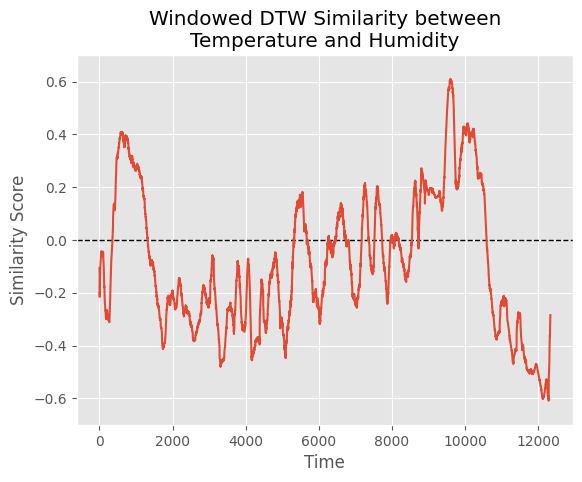

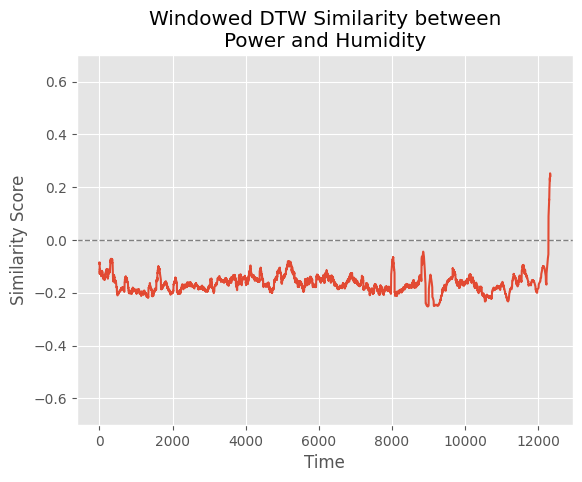

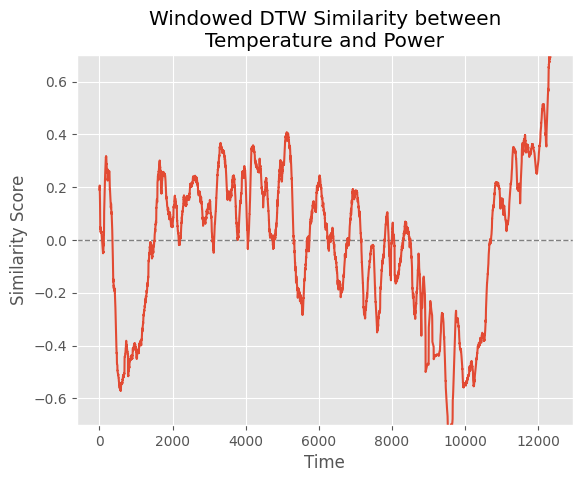

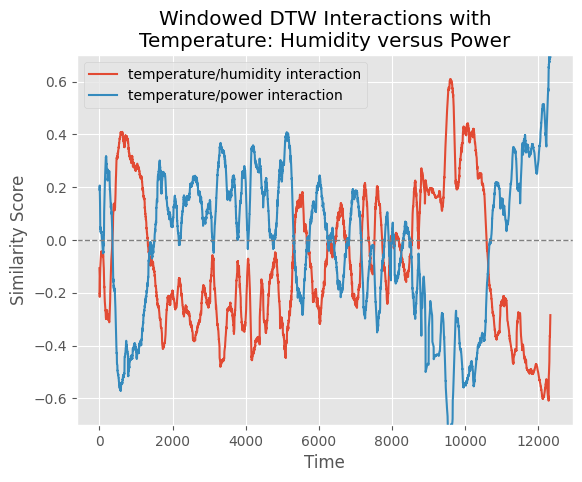

In [13]:
# VISUALIZATIONS FOR SECTION 5

# Following https://pmc.ncbi.nlm.nih.gov/articles/PMC9851773/ and https://www.frontiersin.org/journals/neuroscience/articles/10.3389/fnins.2017.00075/full:
# multiply DWT scores by −1 and demean to transform distance measures to similarity estimates 
def center_signal(x):
    return x - np.min(x) - (np.max(x) - np.min(x)) / 2
    
th_similarity_scores = center_signal([x*-1 for x in th_distance_scores])
ph_similarity_scores = center_signal([x*-1 for x in ph_distance_scores])
tp_similarity_scores = center_signal([x*-1 for x in tp_distance_scores])

# Plot DTW similarity scores
plt.style.use('ggplot')

plt.figure()
plt.axhline(y=0, color='black', linestyle='--', linewidth=1) 
plt.plot(th_similarity_scores)
plt.ylim(-0.7, 0.7)
plt.title('Windowed DTW Similarity between\nTemperature and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(ph_similarity_scores)
plt.ylim(-0.7, 0.7)
plt.title('Windowed DTW Similarity between\nPower and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(tp_similarity_scores)
plt.ylim(-0.7, 0.7)
plt.title('Windowed DTW Similarity between\nTemperature and Power')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.show()

plt.figure() 
plt.plot(th_similarity_scores)
plt.plot(tp_similarity_scores)
plt.legend(['temperature/humidity interaction', 'temperature/power interaction'])
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.ylim(-0.7, 0.7)
plt.title('Windowed DTW Interactions with\nTemperature: Humidity versus Power')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.show()

In [14]:
# Time around 1000
print(filtered_data.iloc[1000]['date'])

# Time around 9500
print(filtered_data.iloc[9500]['date'])

2020-06-15
2020-09-18


In [15]:
# SURROGATE COMPUTATIONS FOR SECTION 5

# Data shuffling
list_th_similarity_scores = []
list_ph_similarity_scores = []
list_tp_similarity_scores = []

temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power]) # Reset signals (undo shuffling for reruns)

for _ in range(1,21): # repeat shuffling/surrogate testing 20 times
    np.random.shuffle(temp_norm)
    np.random.shuffle(hum_norm)
    np.random.shuffle(power_norm)
    
    # Define parameters and placeholders
    window_size = 96  # window covers 1 day in the data if size = 24 * 4 = 96 (4 timepoints per hour)) and 1 week if size = 7 * 96 = 672
    step_size = 1     # Step size for sliding window (e.g., move 1 point forward at each step)
    
    surr_th_distance_scores = []
    surr_ph_distance_scores = []
    surr_tp_distance_scores = []
    
    # Slide the window across the signals
    for i in range(0, len(temp_norm) - window_size + 1, step_size):
        # Define variable windows
        t_window = temp_norm[i:i + window_size]
        h_window = hum_norm[i:i + window_size]
        p_window = power_norm[i:i + window_size]
    
        # Compute alignments
        th_alignment = dtw(t_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        ph_alignment = dtw(p_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        tp_alignment = dtw(t_window, p_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        
        # Store the distance scores for this window
        surr_th_distance_scores.append(th_alignment.normalizedDistance)
        surr_ph_distance_scores.append(ph_alignment.normalizedDistance)
        surr_tp_distance_scores.append(tp_alignment.normalizedDistance)

    surr_th_similarity_scores = center_signal([x*-1 for x in surr_th_distance_scores])
    surr_ph_similarity_scores = center_signal([x*-1 for x in surr_ph_distance_scores])
    surr_tp_similarity_scores = center_signal([x*-1 for x in surr_tp_distance_scores])

    list_th_similarity_scores.append(surr_th_similarity_scores)
    list_ph_similarity_scores.append(surr_ph_similarity_scores)
    list_tp_similarity_scores.append(surr_tp_similarity_scores)

list_th_similarity_scores = np.array(list_th_similarity_scores)
list_ph_similarity_scores = np.array(list_ph_similarity_scores)
list_tp_similarity_scores = np.array(list_tp_similarity_scores)

th_surr = np.mean(list_th_similarity_scores, axis=0)
ph_surr = np.mean(list_ph_similarity_scores, axis=0)
tp_surr = np.mean(list_tp_similarity_scores, axis=0)

th_stderr = sem(list_th_similarity_scores, axis=0)
ph_stderr = sem(list_ph_similarity_scores, axis=0)
tp_stderr = sem(list_tp_similarity_scores, axis=0)

confidence = 0.95 # 95% CI (using t-distribution)
n = list_th_similarity_scores.shape[0]

th_h = th_stderr * t.ppf((1 + confidence) / 2., n - 1)
ph_h = ph_stderr * t.ppf((1 + confidence) / 2., n - 1)
tp_h = tp_stderr * t.ppf((1 + confidence) / 2., n - 1)



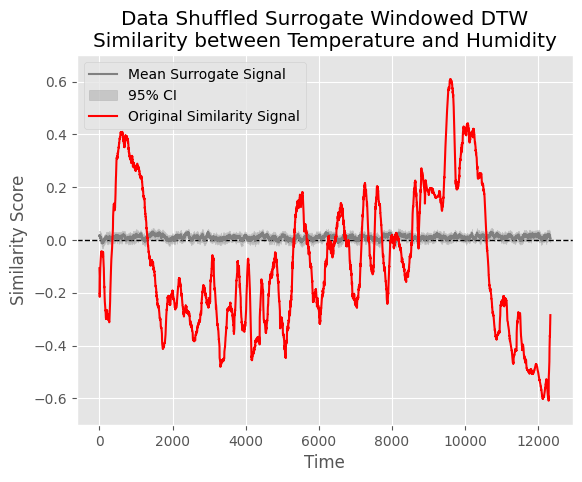

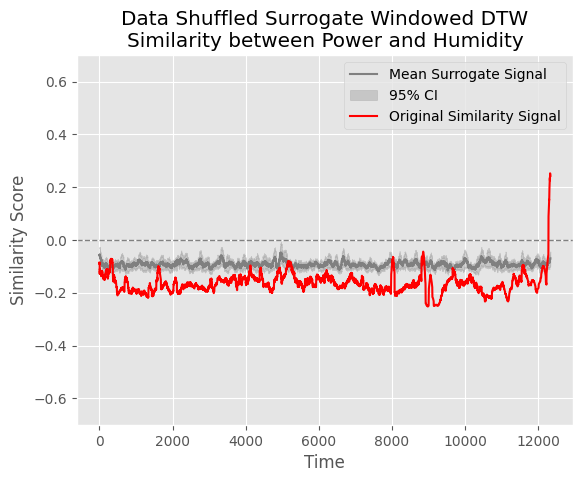

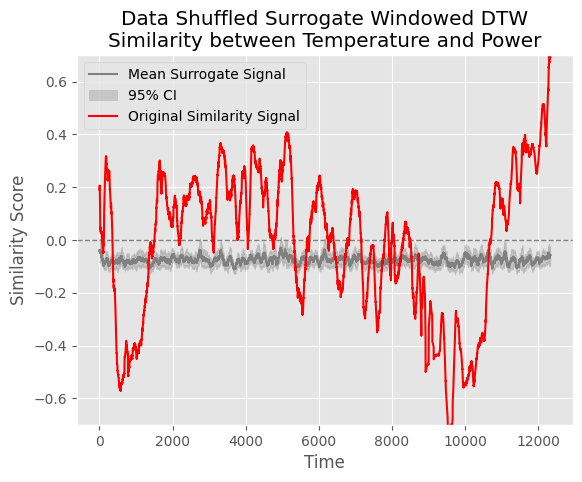

In [18]:
# Visualize
x = np.arange(len(th_surr))

plt.figure()
plt.axhline(y=0, color='black', linestyle='--', linewidth=1) 
plt.plot(th_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, th_surr - th_h, th_surr + th_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(th_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Data Shuffled Surrogate Windowed DTW\nSimilarity between Temperature and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(ph_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, ph_surr - ph_h, ph_surr + ph_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(ph_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Data Shuffled Surrogate Windowed DTW\nSimilarity between Power and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(tp_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, tp_surr - tp_h, tp_surr + tp_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(tp_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Data Shuffled Surrogate Windowed DTW\nSimilarity between Temperature and Power')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

# plt.figure() 
# plt.plot(th_surr)
# plt.plot(tp_surr)
# plt.legend(['temperature/humidity interaction', 'temperature/power interaction'])
# plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
# plt.ylim(-0.7, 0.7)
# plt.title('Surrogate Windowed DTW Interactions with\nTemperature: Humidity versus Power')
# plt.ylabel('Similarity Score')
# plt.xlabel('Time')
# plt.show()

In [19]:
# SURROGATE COMPUTATIONS FOR SECTION 5

# Segment shuffling
list_th_similarity_scores = []
list_ph_similarity_scores = []
list_tp_similarity_scores = []

temp_norm, hum_norm, power_norm = scaler.fit_transform([temp, hum, power]) # Reset signals (undo shuffling for reruns) 

for _ in range(1,21): # repeat shuffling/surrogate testing 20 times

    blocksize = 96
    
    blocks = [temp_norm[i:i+blocksize] for i in range(0,len(temp_norm),blocksize)] # segment the signal
    random.shuffle(blocks) # shuffle the segments
    temp_surr = [b for bs in blocks for b in bs] # concatenate the shuffled segments

    blocks = [hum_norm[i:i+blocksize] for i in range(0,len(hum_norm),blocksize)]
    random.shuffle(blocks)
    hum_surr = [b for bs in blocks for b in bs]

    blocks = [power_norm[i:i+blocksize] for i in range(0,len(power_norm),blocksize)]
    random.shuffle(blocks)
    power_surr = [b for bs in blocks for b in bs]
    
    # Define parameters and placeholders
    window_size = 96  # window covers 1 day in the data if size = 24 * 4 = 96 (4 timepoints per hour)) and 1 week if size = 7 * 96 = 672
    step_size = 1     # Step size for sliding window (e.g., move 1 point forward at each step)
    
    surr_th_distance_scores = []
    surr_ph_distance_scores = []
    surr_tp_distance_scores = []
    
    # Slide the window across the signals
    for i in range(0, len(temp_norm) - window_size + 1, step_size):
        # Define variable windows
        t_window = temp_surr[i:i + window_size]
        h_window = hum_surr[i:i + window_size]
        p_window = power_surr[i:i + window_size]
    
        # Compute alignments
        th_alignment = dtw(t_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        ph_alignment = dtw(p_window, h_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        tp_alignment = dtw(t_window, p_window, keep_internals=True, window_type="sakoechiba", window_args={'window_size': 48})
        
        # Store the distance scores for this window
        surr_th_distance_scores.append(th_alignment.normalizedDistance)
        surr_ph_distance_scores.append(ph_alignment.normalizedDistance)
        surr_tp_distance_scores.append(tp_alignment.normalizedDistance)

    surr_th_similarity_scores = center_signal([x*-1 for x in surr_th_distance_scores])
    surr_ph_similarity_scores = center_signal([x*-1 for x in surr_ph_distance_scores])
    surr_tp_similarity_scores = center_signal([x*-1 for x in surr_tp_distance_scores])

    list_th_similarity_scores.append(surr_th_similarity_scores)
    list_ph_similarity_scores.append(surr_ph_similarity_scores)
    list_tp_similarity_scores.append(surr_tp_similarity_scores)

list_th_similarity_scores = np.array(list_th_similarity_scores)
list_ph_similarity_scores = np.array(list_ph_similarity_scores)
list_tp_similarity_scores = np.array(list_tp_similarity_scores)

th_surr = np.mean(list_th_similarity_scores, axis=0)
ph_surr = np.mean(list_ph_similarity_scores, axis=0)
tp_surr = np.mean(list_tp_similarity_scores, axis=0)

th_stderr = sem(list_th_similarity_scores, axis=0)
ph_stderr = sem(list_ph_similarity_scores, axis=0)
tp_stderr = sem(list_tp_similarity_scores, axis=0)

confidence = 0.95 # 95% CI (using t-distribution)
n = list_th_similarity_scores.shape[0]

th_h = th_stderr * t.ppf((1 + confidence) / 2., n - 1)
ph_h = ph_stderr * t.ppf((1 + confidence) / 2., n - 1)
tp_h = tp_stderr * t.ppf((1 + confidence) / 2., n - 1)


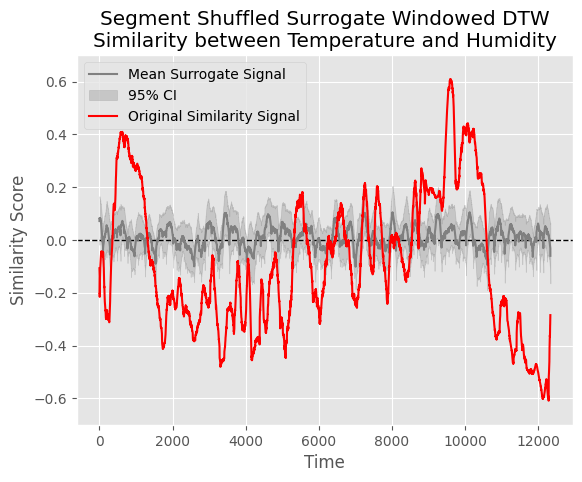

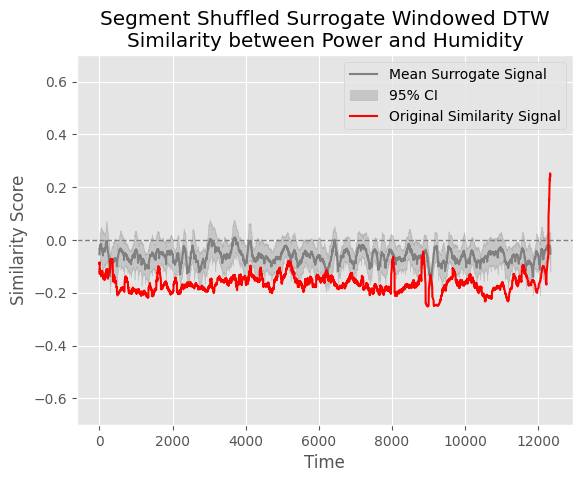

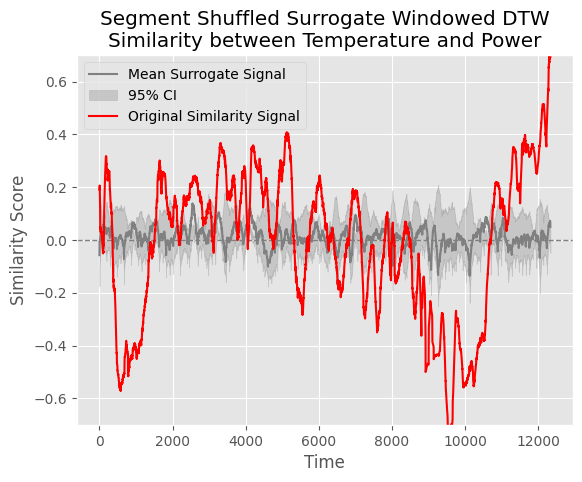

In [20]:
# Visualize
x = np.arange(len(th_surr))

plt.figure()
plt.axhline(y=0, color='black', linestyle='--', linewidth=1) 
plt.plot(th_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, th_surr - th_h, th_surr + th_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(th_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Segment Shuffled Surrogate Windowed DTW\nSimilarity between Temperature and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(ph_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, ph_surr - ph_h, ph_surr +ph_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(ph_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Segment Shuffled Surrogate Windowed DTW\nSimilarity between Power and Humidity')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

plt.figure()
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1) 
plt.plot(tp_surr, label='Mean Surrogate Signal', color='gray')
plt.fill_between(x, tp_surr - tp_h, th_surr + tp_h, color='gray', alpha=0.3, label='95% CI')
plt.plot(tp_similarity_scores, color='red', label='Original Similarity Signal')
plt.ylim(-0.7, 0.7)
plt.title('Segment Shuffled Surrogate Windowed DTW\nSimilarity between Temperature and Power')
plt.ylabel('Similarity Score')
plt.xlabel('Time')
plt.legend()
plt.show()

# plt.figure() 
# plt.plot(th_surr)
# plt.plot(tp_surr)
# plt.legend(['temperature/humidity interaction', 'temperature/power interaction'])
# plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
# plt.ylim(-0.7, 0.7)
# plt.title('Surrogate Windowed DTW Interactions with\nTemperature: Humidity versus Power')
# plt.ylabel('Similarity Score')
# plt.xlabel('Time')
# plt.show()